In [19]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim

In [20]:
class Particle():
    
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt  = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
    # Method
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        
       # print(self.r)
        
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a
    
    def CheckWallLimits(self,limits,e,dim=2):
        
        for i in range(dim):
            
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = - e*self.v[i]
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = - e*self.v[i]
    
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
        
    # Getters  
    def GetPositionVector(self):
        return self.rVector
    
    def GetRPositionVector(self):
        return self.RrVector 
    

    def GetVelocityVector(self):
        return self.vVector
    
    def GetRVelocityVector(self):
        return self.RvVector
    
    def GetR(self):
        return self.radius
    
    def GetVelocity(self):
        return np.linalg.norm(self.v)
    
    def GetPE(self):
        return self.m*9.8*self.r[1]
    
    def GetKE(self):
        return 0.5*self.m*np.power(self.GetVelocity(),2)
    
    def GetMechanicalEnergy(self):
        return self.GetPE()+self.GetKE()
    
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        self.RvVector = np.array([self.vVector[0]]) # initial condition
        
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])
                
               # print(self.RrVector)

**Ejercicio 1**

In [21]:
dt = 0.01
tmax = 30
t = np.arange(0,tmax+dt,dt)

In [22]:
x0 = np.array([-15.,5.])
v0 = np.array([1.,0])
a0 = np.array([0,-9.8])
        
p = Particle(x0,v0,a0,t,1.,1.0,1)

In [23]:
Limits1 = np.array([20.,20.])

In [24]:
def RunSimulation(t):
    found = False
    energy = np.zeros(len(t))
    for it in tqdm(range(len(t))): # Evolucion temporal
        p.CheckWallLimits(Limits1,0.9)
        p.Evolution(it)
        energy[it]=p.GetMechanicalEnergy()
        
        if p.GetVelocityVector()[it,1] <= 0.0001 and p.GetPositionVector()[it,1] <= -19 and not found:
            tfinal = it*dt
            found = True
    return p, tfinal, energy

In [25]:
p, tfinal, energy = RunSimulation(t)

100%|██████████████████████████████████████| 3001/3001 [00:03<00:00, 761.15it/s]


In [26]:
def ReduceTime(t,factor):
    
    p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

In [27]:
redt = ReduceTime(t,100)

<IPython.core.display.Javascript object>


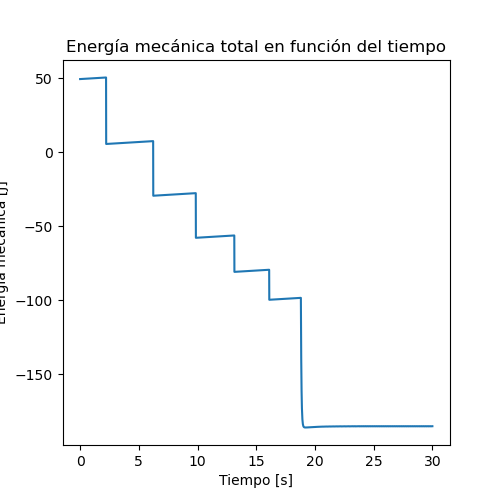

Text(0.5, 1.0, 'Energía mecánica total en función del tiempo')

In [37]:
fig1 = plt.figure(figsize=(5,5))
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(t,energy)
ax1.set_xlabel("Tiempo [s]")
ax1.set_ylabel("Energía mecánica [J]")
ax1.set_title("Energía mecánica total en función del tiempo")

<IPython.core.display.Javascript object>


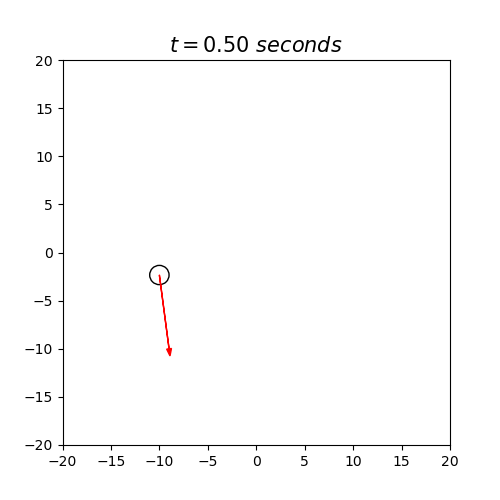

In [29]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def initFallingBall():
    ax.set_xlim(-Limits1[0],Limits1[0])
    ax.set_ylim(-Limits1[1],Limits1[1])

def UpdateFallingBall(i):
    
    plot = ax.clear()
    initFallingBall()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    x = p.GetRPositionVector()[i,0]
    y = p.GetRPositionVector()[i,1]
        
    vx = p.GetRVelocityVector()[i,0]
    vy = p.GetRVelocityVector()[i,1]
        
    circle = plt.Circle( (x,y), p.GetR(), color='k', fill=False)
    plot = ax.add_patch(circle)
    plot = ax.arrow(x,y,vx,vy,color='r',head_width=0.5)
        
    return plot

AnimationFallingBall = anim.FuncAnimation(fig,UpdateFallingBall,frames=len(redt),init_func=initFallingBall)

In [30]:
tfinal

18.82

**Ejercicio 2**

In [31]:
Limits2 = np.array([10.,10.,10.])

In [32]:
def GetParticles(NParticles,Limit,Velo,Dim=2,dt=0.1):
    
    Particles_ = []
    
    for i in range(NParticles):
        
        x0 = np.random.uniform( -Limit+1.0, Limit-1.0, size=Dim )
        v0 = np.random.uniform( -Velo, Velo, size=Dim)
        a0 = np.zeros(Dim)
        
        p = Particle(x0,v0,a0,t,1.,1.0,i)
        
        Particles_.append(p)
        
    return Particles_

In [33]:
def RunSimulation(t,NParticles = 100, Velo = 6):
    
    Particles = GetParticles(NParticles,Limits2[0],Velo = Velo,Dim=3,dt=dt)
    
    for it in tqdm(range(len(t))): # Evolucion temporal
        for i in range(len(Particles)):
            Particles[i].CheckWallLimits(limits=Limits2,e=1.,dim=3)
            Particles[i].Evolution(it)
        
    return Particles

In [34]:
def ReduceTime(t,factor):
    
    for p in Particles:
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

In [35]:
Particles = RunSimulation(t,100,Velo=50)
redt = ReduceTime(t,10)

100%|███████████████████████████████████████| 3001/3001 [00:42<00:00, 69.83it/s]


<IPython.core.display.Javascript object>


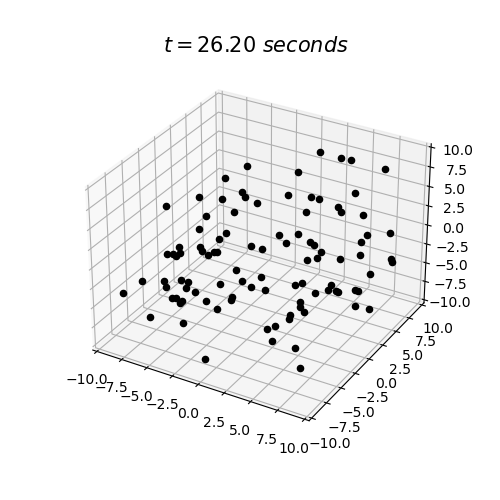

In [36]:
fig3 = plt.figure(figsize=(5,5))
ax3d = fig3.add_subplot(projection='3d')


def init3D():
    ax3d.set_xlim(-Limits2[0],Limits2[0])
    ax3d.set_ylim(-Limits2[1],Limits2[1])
    ax3d.set_zlim(-Limits2[2],Limits2[2])

def Update3D(i):
    
    plot = ax3d.clear()
    init3D()
    plot = ax3d.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    for p in Particles:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
        z = p.GetRPositionVector()[i,2]
        ax3d.scatter(x,y,z,marker='o',c='black')
        
    return plot

Animation3D = anim.FuncAnimation(fig3,Update3D,frames=len(redt),init_func=init3D)